# BUILDING CNN MODEL FOR TRAFFIC SIGN RECOGINITION

INSTALLING TENSORFLOW

In [1]:
!pip install tensorflow==2.5

Defaulting to user installation because normal site-packages is not writeable


INSTALLING SCIKIT-LEARN

In [2]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


INSTALLING KERAS

In [3]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


INSTALLING COMPUTER VISION

INSTALLING ALL OTHER NECESCARRY LIBRARIES

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, load_model

CHECKING VERSION OF TENSORFLOW

In [6]:
tf.__version__

'2.5.0'

First create a empty list for data and labels and define classes as 43 and also set current working directory

In [8]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

Check for current working directory

In [9]:
os.getcwd()

'E:\\Deep Learning\\Project'

Now we are running a loop and fetch  every image 
then we resize image and after that every image is converted into NumPy array
after that we append all images in data list and classes in labels list.

In [10]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


Here we are converting our data and labels into NumPy array for further computation

In [11]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

Here, we are printing shape of our data and labels

In [12]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


Splitting data into training and testing

In [13]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Printing shape of training and testing

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [15]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test,43)

Now, we build our CNN model and adding different layers

In [16]:
#Building the model
model =tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

Now, it's time for model compilation 

In [17]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Now, we fit our model using 15 epochs and batch size = 32

In [18]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 74s 74ms/step - loss: 2.0584 - accuracy: 0.4684 - val_loss: 0.5177 - val_accuracy: 0.8604
Epoch 2/15
981/981 [==============================] - 95s 97ms/step - loss: 0.7235 - accuracy: 0.7888 - val_loss: 0.2569 - val_accuracy: 0.9225
Epoch 3/15
981/981 [==============================] - 90s 92ms/step - loss: 0.4754 - accuracy: 0.8597 - val_loss: 0.1384 - val_accuracy: 0.9648
Epoch 4/15
981/981 [==============================] - 98s 99ms/step - loss: 0.3660 - accuracy: 0.8953 - val_loss: 0.1380 - val_accuracy: 0.9614
Epoch 5/15
981/981 [==============================] - 90s 92ms/step - loss: 0.3128 - accuracy: 0.9108 - val_loss: 0.0818 - val_accuracy: 0.9781
Epoch 6/15
981/981 [==============================] - 91s 93ms/step - loss: 0.3005 - accuracy: 0.9164 - val_loss: 0.0873 - val_accuracy: 0.9759
Epoch 7/15
981/981 [==============================] - 87s 89ms/step - loss: 0.2839 - accuracy: 0.9223 - val_loss: 0.0864 - val_accuracy:

Saving our model

In [19]:
model.save("traffic_class.h5")

Plotting accuracy for training and validation

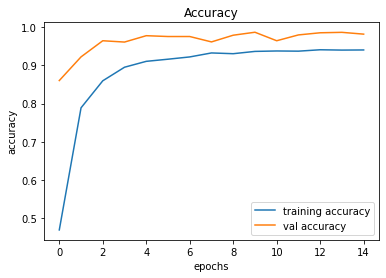

In [20]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Plotting loss for training and validation

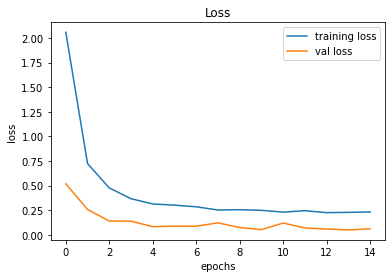

In [21]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Testing accuracy on test dataset

In [22]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv("E:\\Deep Learning\\Project\\CSV\\Test.csv")
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

Here, we create one empty data list and then open every image 
then resize every image and after that every image is appended
in our data list in the form of NumPy array.

In [23]:
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

In [24]:
X_test=np.array(data)

Now, we predict our model

In [27]:
#pred = model.predict_classes(X_test)

In [26]:
pred= np.argmax(model.predict(X_test), axis=-1)

Printing Prediction accuracy 

In [28]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9426761678543151


In [31]:
train_acc = model.evaluate(X_train,y_train)
print (train_acc)

981/981 [==============================] - 17s 18ms/step - loss: 0.0406 - accuracy: 0.9879
[0.04058024287223816, 0.987853467464447]


Saving model

In [32]:
model.save('traffic_class.h5')

# GUI

In [33]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

In [34]:
#load the trained model to classify sign
from tensorflow.keras.models import load_model
model = load_model('traffic_class.h5')

In [35]:
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [36]:
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#ffbdde')

In [37]:
label=Label(top,background='#00002e', font=('arial',15,'bold'))
sign_image = Label(top)

In [38]:
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#FFFFFF', text=sign) 


In [39]:
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#000000', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

In [40]:
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

In [41]:
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#00002e', foreground='white',font=('arial',10,'bold'))

In [ ]:
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#000000',foreground='#FFFFFF')
heading.pack()
top.mainloop()

C:\Users\sahil\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Double curve
Road work
Road narrows on the right
Right-of-way at intersection
Double curve
